In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

- pID: pitcher ID
- bID: batter ID
- AB: number of At Bats
- PA: number of Plate Appearances
- H: number of Hits
- SLUG: slugging value (H + 2*2B + 3*3B + 4*HR)
- W: number of Walks
- SO: number of Strike Outs
- SAC: number of Sac Flies and Sac Bunts

In [12]:
matchup_df = pd.read_json("data/matchups_2004.json")
matchup_df.head()

,AB,H,PA,RL,SAC,SO,TB,W,bID,pID
0,5,1,5,R,0,2,1,0,torrc001,medlk001
1,3,0,3,L,1,2,0,0,kinnm002,leita001
2,4,1,4,R,0,2,1,0,valee002,ayall001
3,7,0,7,R,0,4,0,0,valee002,beckj002
4,3,2,6,R,0,0,2,3,valee002,bumpn001


In [6]:
batter_sums = matchup_df.groupby('bID').sum() #by-batter totals for H, AB, etc.
batter_matchups = matchup_df.groupby('bID')['AB'].count() #Number of pitchers seen by each player

In [11]:
batter_sums.head()

,AB,H,PA,SAC,SO,TB,W
bID,,,,,,,
abada001,7,1,8,0,1,1,1
abbop001,4,0,4,0,1,0,0
aberb001,621,148,664,9,70,231,43
aberr001,145,45,153,1,30,84,8
abreb001,7568,2193,8980,74,1659,4418,1412


In [15]:
batter_sums['AVG'] = batter_sums['H']/batter_sums['AB']
batter_sums['OBP'] = (batter_sums['H'] + batter_sums['W'])/batter_sums['PA']

In [36]:
#Finding the mean and median overall batting average from this data
mean_avg = batter_sums['AVG'].mean()
med_avg = batter_sums['AVG'].median()
print "Mean Batting Average: %0.3f" % mean_avg
print "Median Batting Average: %0.3f" % med_avg

Mean Batting Average: 0.220
Median Batting Average: 0.246


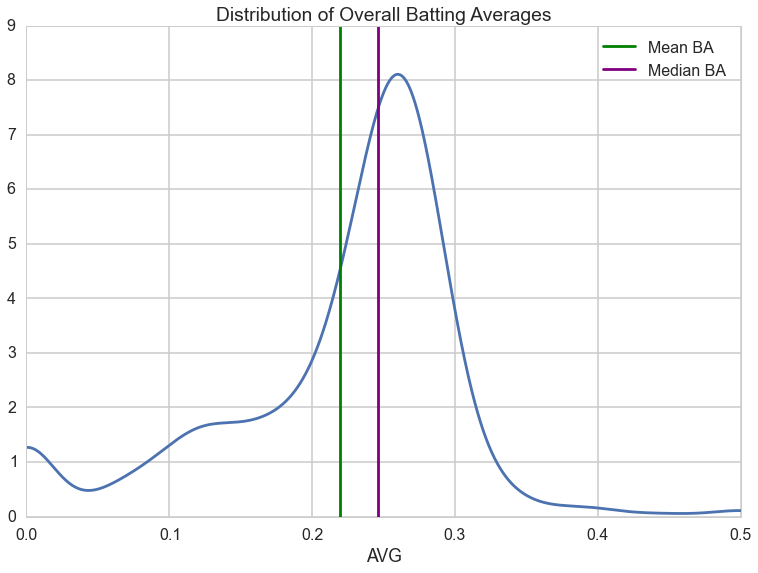

In [37]:
kde = stats.gaussian_kde(batter_sums['AVG'])
x = np.linspace(0, .5, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Overall Batting Averages")
plt.xlabel("AVG")
plt.axvline(mean_avg, 0, 10, color='g', label="Mean BA")
plt.axvline(med_avg, 0, 10, color='purple', label="Median BA")
plt.legend()

In [39]:
#Finding the mean and median overall on base percentage from this data
mean_obp = batter_sums['OBP'].mean()
med_obp = batter_sums['OBP'].median()
print "Mean On-Base Percentage: %0.3f" % mean_obp
print "Median On-Base Percentage: %0.3f" % med_obp

Mean On-Base Percentage: 0.277
Median On-Base Percentage: 0.307


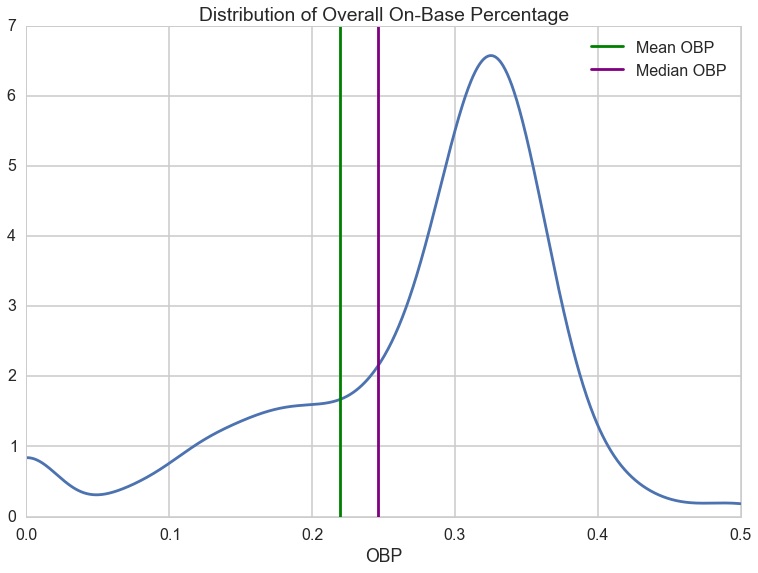

In [40]:
kde = stats.gaussian_kde(batter_sums['OBP'])
x = np.linspace(0, .5, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Overall On-Base Percentage")
plt.xlabel("OBP")
plt.axvline(mean_avg, 0, 10, color='g', label="Mean OBP")
plt.axvline(med_avg, 0, 10, color='purple', label="Median OBP")
plt.legend()

In [54]:
#Distribution of batter matchups - the number of pitchers each batter has faced
mean_matchups = batter_matchups.mean()
med_matchups = batter_matchups.median()
print "Mean Number of Matchups: %0.1f" % mean_matchups
print "Median Number of Matchups: %0.1f" % med_matchups

Mean Number of Matchups: 133.3
Median Number of Matchups: 45.5


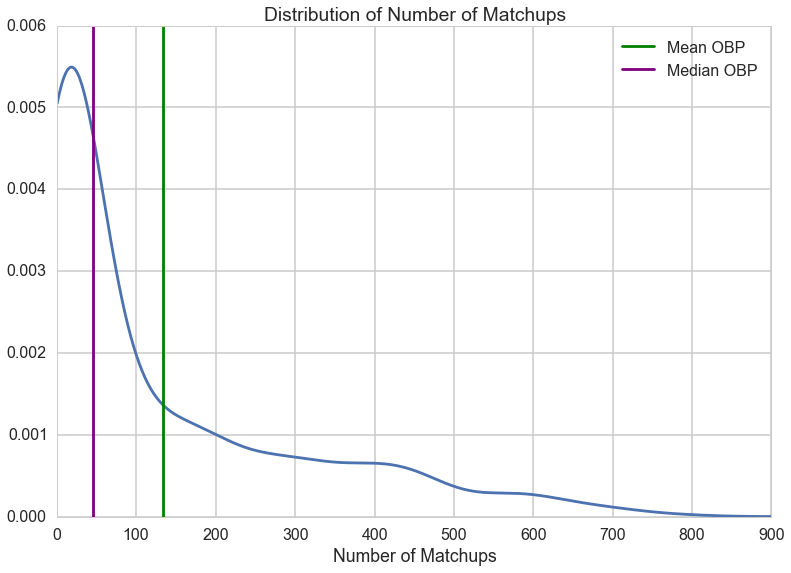

In [55]:
kde = stats.gaussian_kde(batter_matchups)
x = np.linspace(0, 900, 1000)
plt.plot(x, kde(x))
plt.title("Distribution of Number of Matchups")
plt.xlabel("Number of Matchups")
plt.axvline(mean_matchups, 0, 10, color='g', label="Mean OBP")
plt.axvline(med_matchups, 0, 10, color='purple', label="Median OBP")
plt.legend()